# Decision Trees

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


- The accuracy on the training data is 100%.
    - This is because the tree is grown deep enough that it can perfectly memorize all the labels on the training data.
- Unpruned trees are prone to overfitting.

In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## Analyzing Decision Trees

Visualize the tree using the `export_graphviz` function from the `sklearn.tree` module.
- This function generates a `.dot` file, which is a text file format for storing graphs.

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

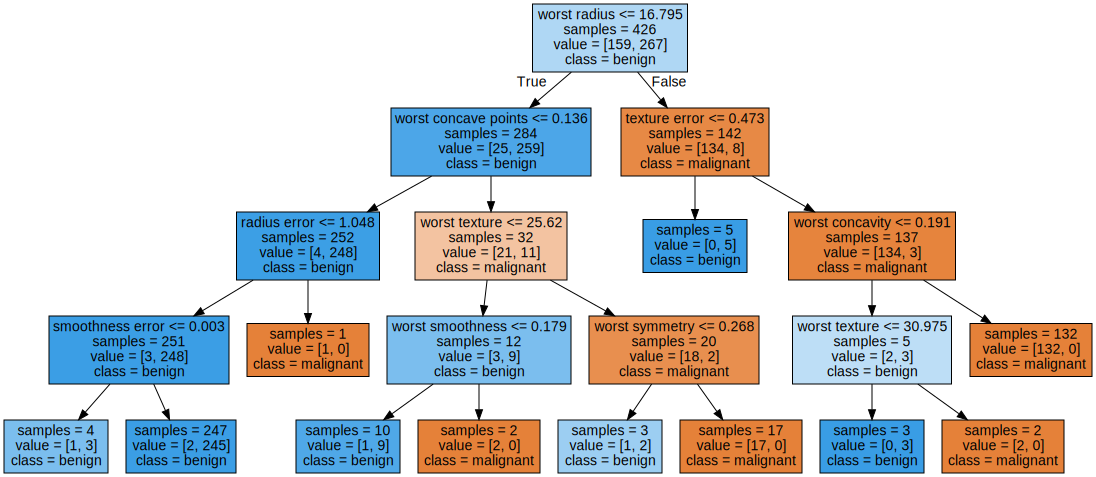

In [9]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- The graph view of the tree provides a great in-depth view of how the model makes predictions.
- However, with high depth, the tree can become too large to interpret.
    - -> Find out which path most of the data actually takes.

## Feature Importance

- The feature importance rates how important each feature is for the decision a tree makes.
- It is a number between 0 and 1 for each feature, where 0 means "not used at all" and 1 means "perfectly predicts the target".
- The feature importances always sum to 1.
- How to calculate feature importance:
    - The feature importance is calculated by the amount that each feature split point improves the impurity criterion (Gini impurity in this case).
    - The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

In [10]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


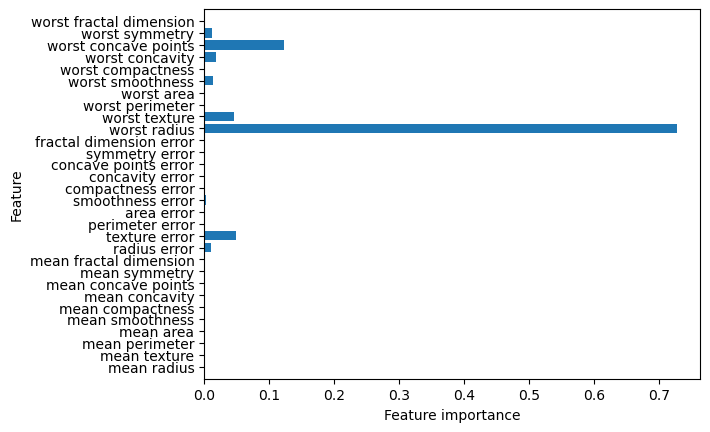

In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

- The feature use din the top split "worst radius" is by far the most important feature.
- This confirms our observation in the visualization of the tree, where the first level already separates the two classes fairly well.

- However, if a feature has a low importance, it doesn't mean that this feature is uninformative.
    - It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

- In constrast to the coefficients in linear models, the feature importances provide insight into the model, but they don't tell you in which direction the relationship is (positive or negative).
- The feature importances tell you which features are important, but not whether high values of that feature indicate a sample is likely to be benign or malignant.

Feature importances: [0. 1.]


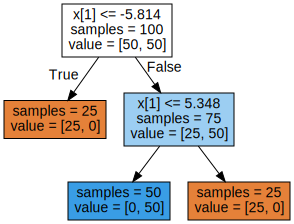

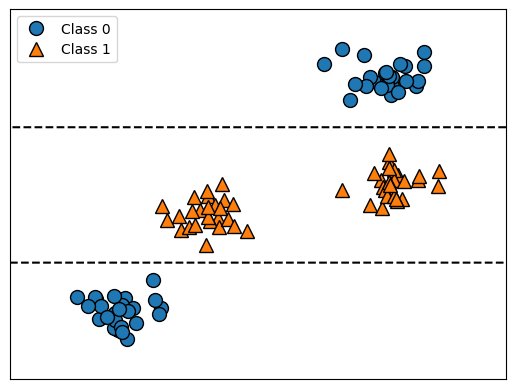

In [12]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

- All the information is contained in `X[1]`, and `X[0]` is not used at all.
- But the relation between `X[1]` and the output class is not 'monotonous'.
    - That is, there is no simple rule such as "if `X[1]` is larger than a certain value, the sample is predicted to be class 1".

## DecisionTreeRegressor

- The `DecisionTreeRegressor` works in the same way as the `DecisionTreeClassifier`, but makes predictions that are continuous rather than categorical.
- The predictions are the average target value of the training samples associated with the leaf node of the test sample.

Text(0, 0.5, 'Price in $/Mbyte')

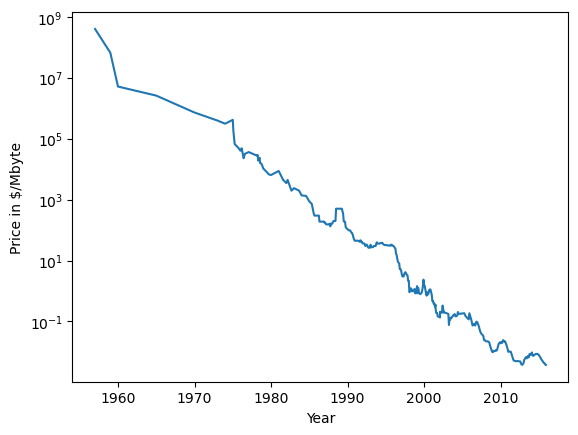

In [13]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date.to_numpy()[:, np.newaxis]
 
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

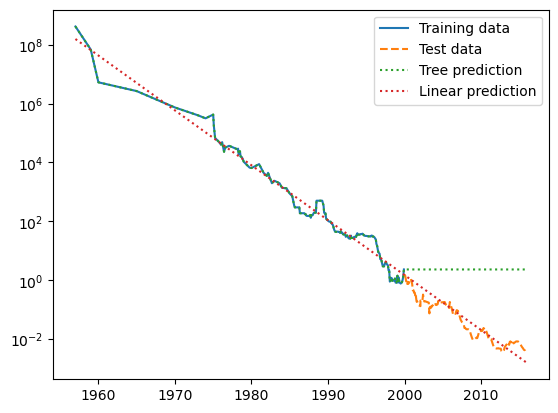

In [21]:
plt.semilogy(data_train.date, data_train.price, label="Training data", linestyle='-')
plt.semilogy(data_test.date, data_test.price, label="Test data", linestyle='--' )
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction", linestyle=':')
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction", linestyle=':')
plt.legend()

- Linear Model:
    - Provides a good forecast for the test data (the years after 2000).
- Tree Model:
    - Makes perfect predictions on the training data.
    - Once the test data is outside the range of the training data, the tree model just keeps predicting the last known point.

- The tree is not able to extrapolate, and makes constant predictions for any test data point beyond the range of the training data.
- This is a common property of decision tree models.

## Parameters

- The important parameters to control the complexity of a decision tree are:
    - `max_depth`: The maximum depth of the tree.
    - `min_samples_split`: The minimum number of samples a node must have before it can be split.
    - `min_samples_leaf`: The minimum number of samples a leaf node must have.
    - `max_leaf_nodes`: The maximum number of leaf nodes.
    - `max_features`: The maximum number of features that are evaluated for splitting at each node.

## Pros and Cons

- Pros:
    - Easy to view and understand.
    - Invariant to scaling of the data. -> No need to standardize or normalize features.
    - Works well when you have features that are on completely different scales, or a mix of binary and continuous features.

- Cons:
    - Overfit even with pre-pruning. -> In most practices, the ensemble methods are used.